In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

2.9.3


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

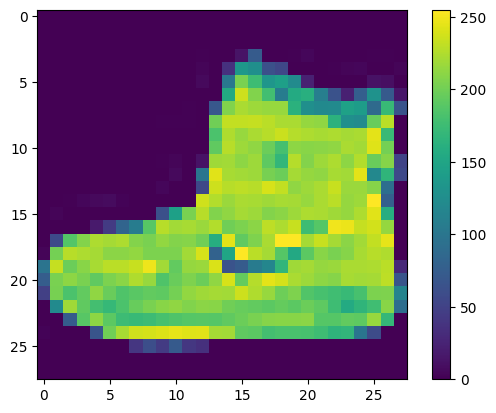

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

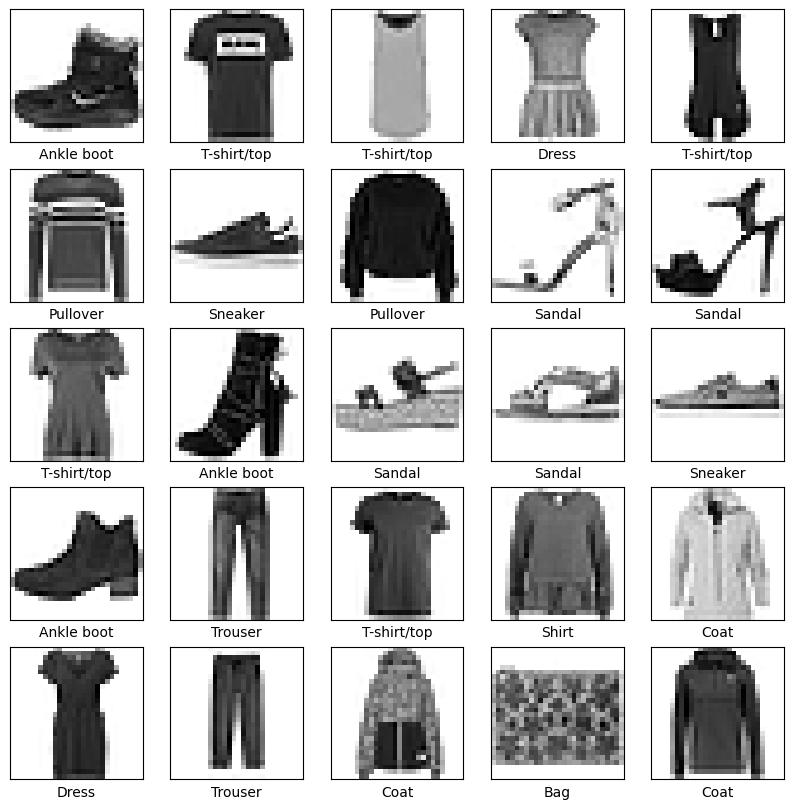

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4948 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3736 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3338 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3142 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2942 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2799 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2669 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2574 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2465 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.237

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3340 - accuracy: 0.8847 - 957ms/epoch - 3ms/step

Test accuracy: 0.8847000002861023


In [12]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 822us/step


array([6.6298952e-07, 1.2907346e-09, 2.2471924e-09, 1.6211688e-09,
       1.5316695e-08, 2.5006495e-03, 1.5023226e-06, 1.7655998e-02,
       3.4049296e-07, 9.7984070e-01], dtype=float32)

In [13]:
np.argmax(predictions[0])

9

In [14]:
test_labels[0]

9

In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
                                
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

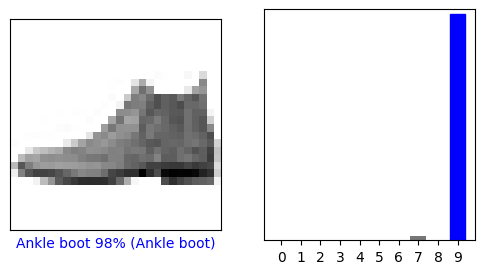

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)  # Pass a single label instead of the entire array
plt.show()

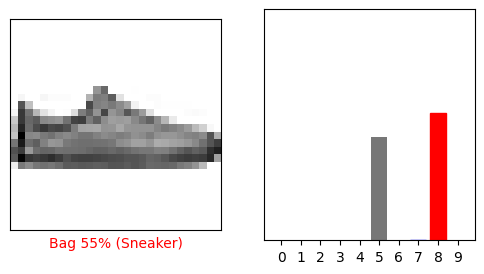

In [17]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

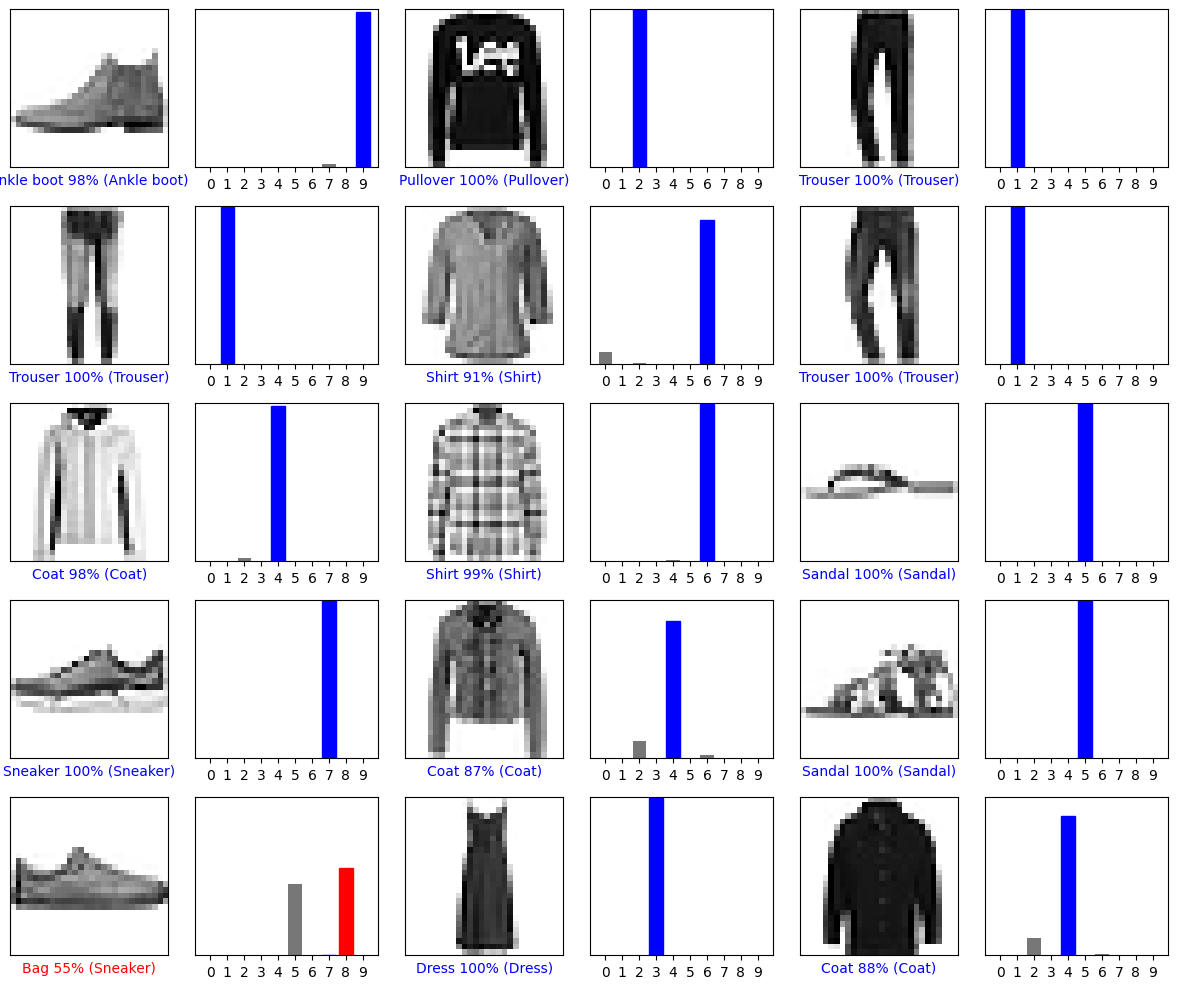

In [18]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()